<a href="https://colab.research.google.com/github/patigi/dataintern/blob/master/hamoyestageB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [ ]:
data = pd.read_csv(r"C:\Users\USER\Desktop\Hamoye\energydata.csv")

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Data Exploration

In [ ]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [ ]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

#### There are no missing values in the dataset as shown above


## Data Visualization

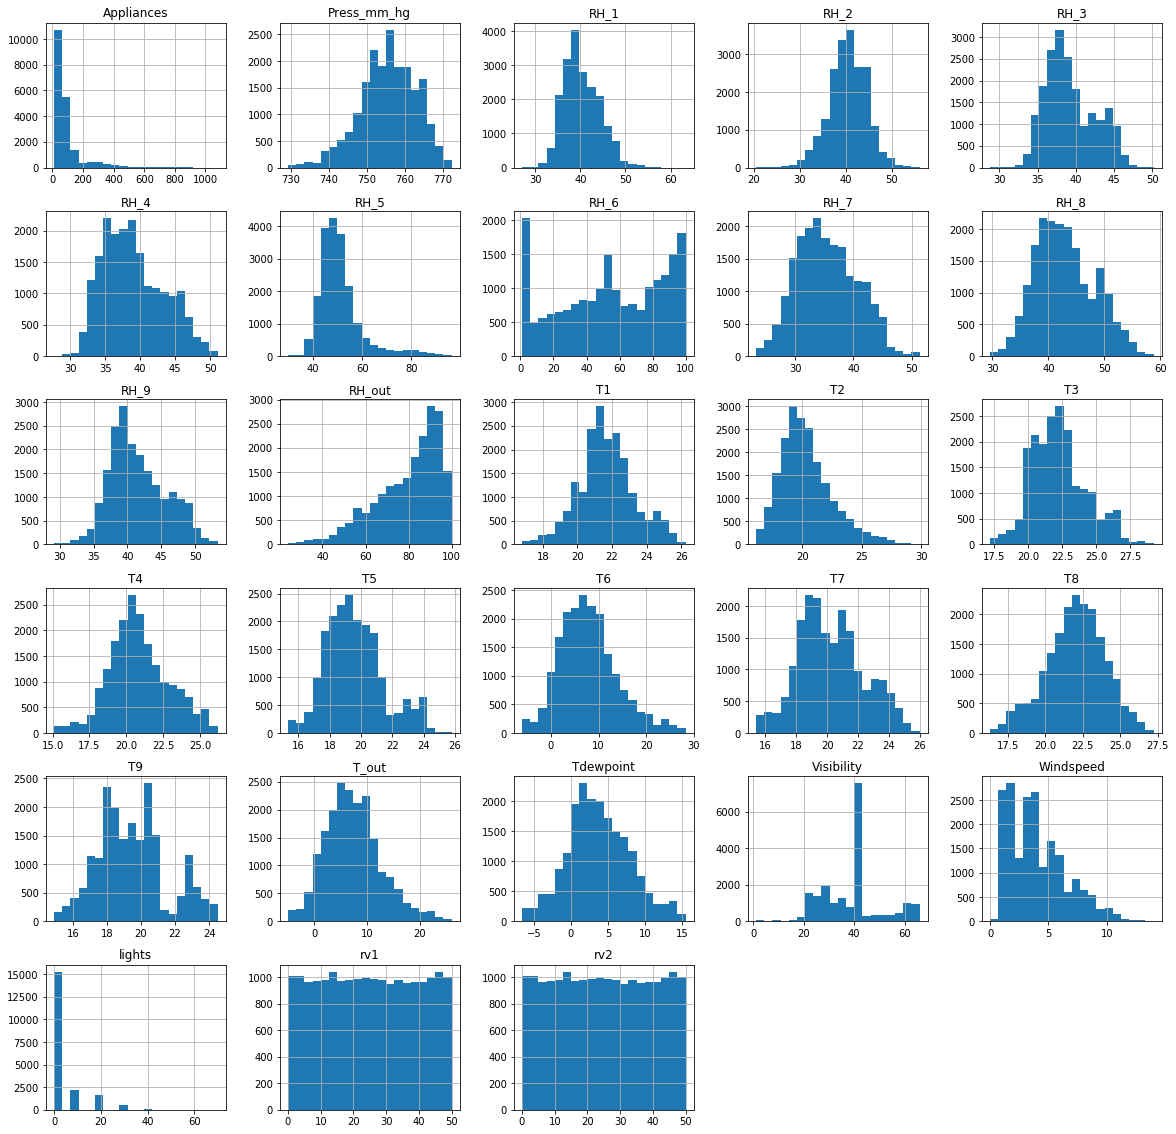

In [ ]:
# lets visualize the histogram of all the features to understand the  distribution

data.hist(bins=20, figsize=(20,20));

In [ ]:
# dropping the lights column
data.drop(['lights'], axis=1,inplace=True)

# dropping the date column since its not a time series problem
data.drop(['date'], axis=1, inplace=True)

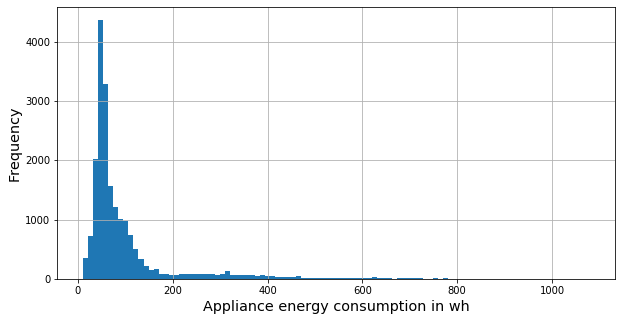

In [ ]:
# lets take a closer look at the appliance column

data['Appliances'].hist(bins = 100, figsize=(10,5))
plt.xlabel('Appliance energy consumption in wh', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large');

On above plot most values are in the range of 0-200Wh, confirming our assumption that there are few cases of high energy consumption. The percentage of values within this range is calculated below. This column is postively skewed , There are outliers in this column.

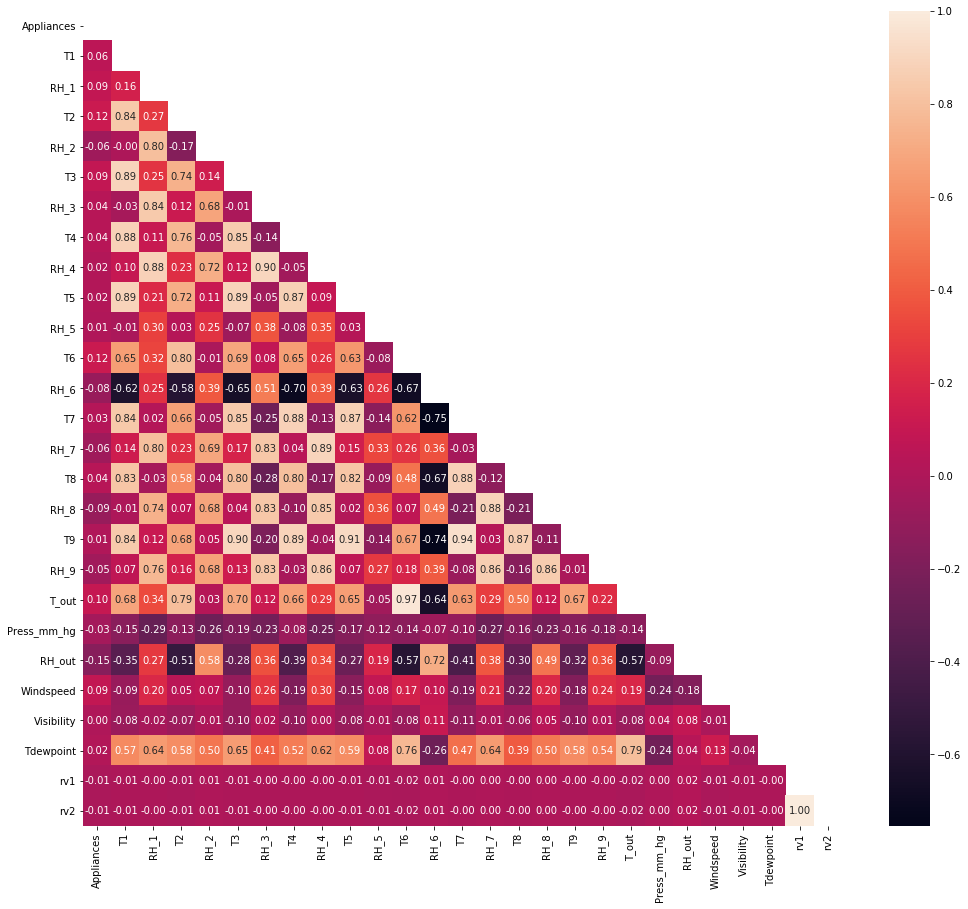

In [ ]:
# Use the weather , temperature , applainces and random column to see the correlation

corr = data.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
fig = plt.figure(figsize=(17, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask);

In [ ]:
# lets see how each features correlates with the target column
cor_matrix = data.corr()
cor_matrix['Appliances']

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Observations from correlation plots

    Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances.

    Four columns have a high degree of correlation with T9 (T3,T5,T7,T8). Also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

    Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

    Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.

    The random varibles have no role to play

### Data preprocessing

In [ ]:
# Due to the conclusions made above, lets drop the following columns, T9 and T6 from the dataset.

data.drop(['T9', 'T6', 'rv1', 'rv2'], axis=1, inplace=True)

In [ ]:
# Applying MinMaxScaler to scale the features column 

from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler
scaler = MinMaxScaler()

# normalizing the features
normalized_features = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
# splitting data into features(independent) and target(dependent) variables

# predictors
features = normalized_features.drop(['Appliances'], axis=1)

# target variable
target = normalized_features['Appliances']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 50, random_state = 42)

In [ ]:
print(f'shape of training set is {X_train.shape}')
print(f'shape of testing set is {X_test.shape}')

shape of training set is (19685, 22)
shape of testing set is (50, 22)


### Model Implementation

We will be looking at following Algorithms

#### Improved Linear regression models

1.Ridge regression

2.Lasso regression

#### Support Vector Machine

3.Support vector regression

#### Nearest neighbour Regressor

4.KNeighborsRegressor

#### Ensmble models

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

#### Neural Network

8.Multi Layer Preceptron Regressor

In [ ]:
# importing the required algorithms
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

In [ ]:
# helper funtion to compute the score, RMSE, time on the training and testing set

def pipeline(models, X_train, X_test, y_train, y_test):
   
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(X_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(X_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_data = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_data.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
        
        
    return summary_data
        

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.134373,-0.244590,0.042964,0.004140,0.064340
1,Lasso,0.000000,-0.070082,0.042621,0.003559,0.059659
2,ElasticNet,0.000000,-0.070082,0.042621,0.003559,0.059659
3,LinearRegression,0.134794,-0.280638,0.043507,0.004260,0.065265
4,KNeighborsRegressor,0.732175,0.344965,0.022430,0.002179,0.046677
5,RandomForestRegressor,0.947487,0.491220,0.019619,0.001692,0.041137
6,ExtraTreesRegressor,1.000000,0.549642,0.018036,0.001498,0.038703
7,GradientBoostingRegressor,0.317126,0.052175,0.033773,0.003153,0.056148
8,DecisionTreeRegressor,1.000000,-0.190114,0.026916,0.003958,0.062916


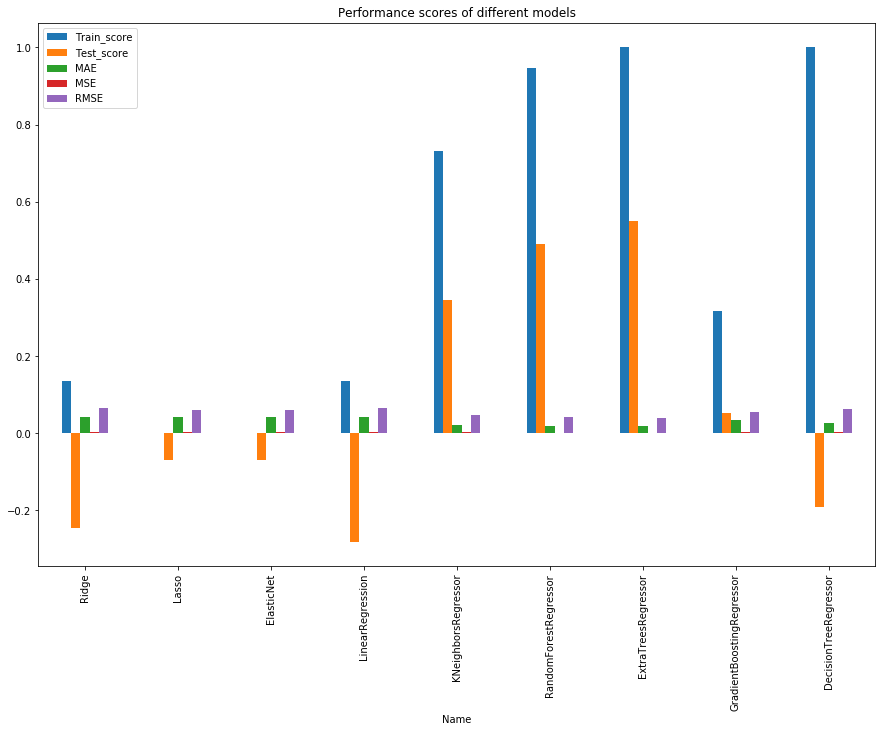

In [ ]:
pipeline(models, X_train, X_test, y_train, y_test)


### Obervations

    Best results over test set are given by Extra Tree Regressor with R2 score of 0.57
    Least RMSE score is also by Extra Tree Regressor 0.65
    Lasso regularization over Linear regression was worst performing model



### Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# define the param grid
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [10, 50, 100, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]

reg = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(reg, param_grid, cv = 6, n_jobs = -1 , scoring='r2' , verbose=2)

# fit the gridserch model
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.9min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [ ]:
# check for the best param fot the ExtraTreeReggressor

print(f'best param of the ExtraTreeRegressor is: {grid_search.best_params_}')

best param of the ExtraTreeRegressor is: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 200}


In [ ]:
# Best possible estimator for ExtraTreesRegressor

best_model = grid_search.best_estimator_

print(f'print R2_score on training_set with tuned parameters: {best_model.score(X_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(best_model.score(X_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(X_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.54
print MSE_score on testing_set with tuned parameters: 0.002
print RMSE_score on testing_set with tuned parameters: 0.039


#### RandomForestRegressor parameter

In [ ]:
# intantiate the grid params
param_grid = [
 {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10],
  'max_depth':[10, 15]},
 {'bootstrap': [False], 'n_estimators': [1, 3, 10], 'max_features': [2, 3, 4]},
 ]

# instantiate the random forest regressor
forest_reg = RandomForestRegressor()

# instanntiate the grid serch
grid_search = GridSearchCV(forest_reg, param_grid, cv=6, scoring='r2')

# fit the grid serchon training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# get best params
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [ ]:
# get best model
model = grid_search.best_estimator_

In [ ]:
print(f'print R2_score on training_set with tuned parameters: {model.score(X_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(model.score(X_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, model.predict(X_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.591
print MSE_score on testing_set with tuned parameters: 0.001
print RMSE_score on testing_set with tuned parameters: 0.037


Observations

Based on parameter tunning step we can see that

    Best possible parameter combination are - 'bootsraps': Fasle, 'max_features': 4, 'n_estimators': 10
    Training set R2 score of 1.0 may be signal of overfitting on training set
    Test set R2 score is 0.59 improvement over 0.57 achieved using untuned model.
    Test set MSE score remains same as untuned model
    Test set RMSE score is 0.037 improvement over 0.64 achieved using untuned model.

#### Feature Importance

In [ ]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

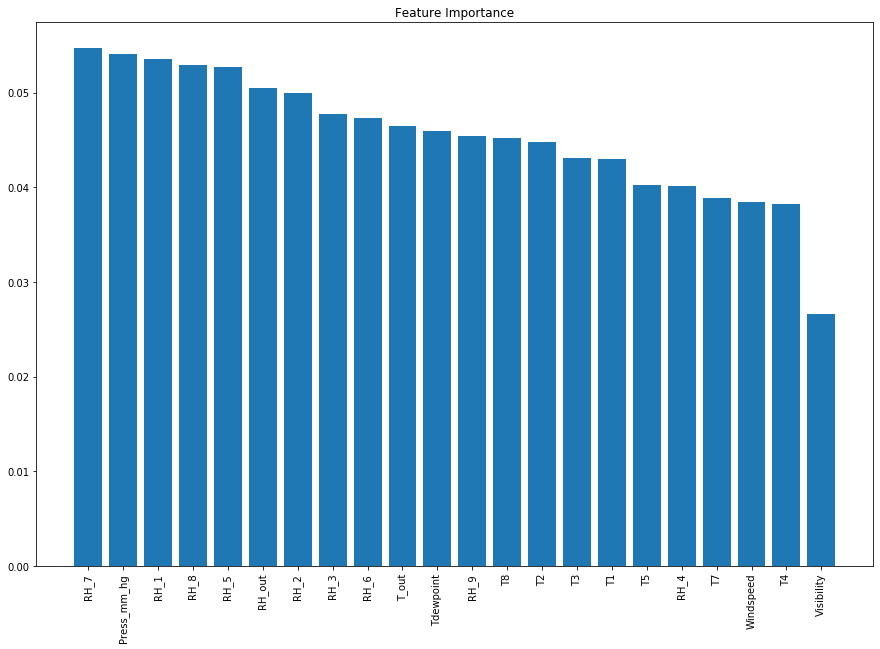

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(15, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# Get top 10 most important feature 
names[0:8]

['RH_7', 'Press_mm_hg', 'RH_1', 'RH_8', 'RH_5', 'RH_out', 'RH_2', 'RH_3']

In [ ]:
# Reduce test & training set to 10 feature set
train_important_feature = X_train[names[0:8]]
test_important_feature = X_test[names[0:8]]

In [ ]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Reduced dataset scores 

print('Training set R2 Score - ', r2_score(y_train, cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', r2_score(y_test, cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(y_test, cloned_model.predict(test_important_feature))))

Training set R2 Score -  1.0
Testing set R2 Score -  0.44613501959013036
Testing set RMSE Score -  0.04292091051399261


##### Observations Based on parameter tunning step we can see that

    8 most important features are - 'RH_7', 'Press_mm_hg', 'RH_1', 'RH_8', 'RH_5', 'RH_out', 'RH_2', 'RH_3'

    As can be observed with R2 Score , compared to Tuned model 0.45 the R2 score has come down to 0.54. The reduction in R2 score is high and we should not use reduced feature set for this data set.



##### Conclusion

    The best Algorithm to use for this dataset ExtraTreeRegressor.

    The untuned model was able to explain 53% of variance on test set .

    The tuned model was able to explain 62% of varaince on test set which is improvement 5%.

    The final model had 22 features.

    Feature reduction was not able to add to better R2 score.

